<h1 style="text-align: center;"><b><u>Mitigating Overfitting in Hyperparameter Selection for Trading Strategies Using Randomized In-Sample Evaluation</u></b></h1>


<p> <b> May 20, 2025 </p>

<h2 style="text-align: left;"><b>Abstract</b></h2>


<p> In quantitative finance and algorithmic trading, hyperparameter tuning is often performed via a traditional train-test split, with the best-performing model on the in-sample data evaluated on a holdout set. However, this approach is prone to overfitting, particularly when evaluating a large grid of parameters, as it optimizes to a single realization of the in-sample period. In this study, we propose a robust method to reduce overfitting by introducing randomized subsampling within the in-sample (training) data. Instead of selecting hyperparameters based solely on performance over a single in-sample period, we compute <b><i>pooled</i></b> Sharpe ratios from multiple random samples of the training set. The hyperparameters with the highest pooled Sharpe ratio are then tested on the out-of-sample data. We empirically compare this method to the classic approach across a large grid of strategy parameters. Using statistical testing on the ranks of parameter performance, we show that our method yields lower rank divergence between in-sample and out-of-sample performance, indicating a more stable and less overfit model selection process. This framework offers a practical enhancement to hyperparameter selection workflows in trading strategy development. </p>


<h2 style="text-align: left;"><b>Literature Review</b></h2>

<p> Traditional approaches to model evaluation in financial machine learning often rely on train-test splits, 
where hyperparameters are selected based on in-sample performance and then validated out-of-sample (Bailey et al., 2014; López de Prado, 2018). However, this method can lead to overfitting, especially when extensive grid searches are used, as it capitalizes on noise within the in-sample period. Various techniques, such as cross-validation and nested cross-validation (Varma & Simon, 2006), have been proposed to mitigate this, though they are less commonly adopted in time-series settings due to data dependencies. To improve robustness, some studies advocate for performance aggregation methods across multiple subsamples (Hansen & Lunde, 2005). In particular, pooling performance metrics like the Sharpe ratio across random subsamples provides a more stable estimator of a strategy’s risk-adjusted return by incorporating variability across multiple data slices (Ledoit & Wolf, 2008). Despite its statistical rigor, pooled Sharpe ratio estimation is underutilized in hyperparameter selection frameworks, motivating its integration into a more robust model selection process. </p>


<h2 style="text-align: left;"><b>Data</b></h2>

<p> This study utilizes a dataset comprising 22 Contract for Difference (CFD) instruments sourced from OANDA, a reputable provider of retail trading data. The dataset spans a five-year period from 2000 to 2004, with a temporal resolution of one hour. After removing incomplete records, the total number of observations across all instruments is 604,321.
Each CFD instrument is individually processed, with its time series divided into an in-sample set (80%) used for model selection and training, and an out-of-sample set (20%) reserved strictly for performance evaluation. To mitigate overfitting during hyperparameter selection, the in-sample data is further subjected to randomized subsampling, where 80% of the in-sample data is randomly selected multiple times. Performance metrics, particularly the Sharpe ratio, are aggregated across these subsamples to compute a pooled estimate, which informs parameter selection. This hierarchical splitting structure allows for a robust assessment of the proposed method’s ability to generalize beyond the specific training realizations.

<h2 style="text-align: left;"><b>Methodology</b></h2>

<h3>Modified MACD Strategy</h3>

<p>
The strategy adapts the traditional Moving Average Convergence Divergence (MACD) indicator for trend-following, where positions are determined based on the relative strength of the trend. Rather than issuing discrete buy/sell signals, the strategy uses a continuous exposure derived from a normalized-zero-to-one vector for positive MACD histogram values and a normalized-zero-to-negative-one vector for negative values.
</p>

<div style="text-align: center;">
  <img src="./images/macd.png" alt="Normalized MACD Position Formula" width="600">
</div>


<h3>1. Sample splits</h3>

<p> To evaluate the robustness of hyperparameter selection in the presence of potential overfitting, we adopt a structured experiment design applied to each of the 22 CFD instruments individually. The dataset for each instrument is split chronologically into two subsets:
In-sample (Training): 80% of the data
Out-of-sample (Testing): 20% of the data
On the in-sample portion, we perform a grid search over a set of hyperparameters for a modified MACD-based trend-following strategy (details provided in a later section). For each parameter combination, we compute the Sharpe ratio and use it to rank the strategies based on their in-sample performance.
Once the best-performing parameters are identified from the in-sample data, we evaluate them on the out-of-sample data using the same Sharpe ratio metric. To measure the consistency of performance, we calculate the rank delta—the change in ranking between in-sample and out-of-sample performance—for each parameter set. This rank delta serves as a proxy for the degree of overfitting: large shifts suggest over-optimized parameters that fail to generalize.
</p>

<div style="text-align: center;">
  <img src="./images/sample_split1.png" alt="Pooled Sharpe Ratio Formula" width="600">
</div>



<h3>2. Randomized In-Sample Evaluation</h3>

<p>
To enhance the robustness of hyperparameter selection and mitigate overfitting to a single in-sample partition, the in-sample set (80% of the original data) is further subjected to randomized subsampling. Specifically, for each instrument, we perform <b>10 random shuffles</b>, each selecting a random <b>80% subset</b> of the original in-sample data. On each of these randomized folds, the same hyperparameter grid search is executed using a modified MACD trend-following strategy.
</p>

<p>
For every parameter combination evaluated across the folds, we compute the Sharpe ratio based on each fold's return and standard deviation. These Sharpe ratios are then aggregated across the 10 folds using a <b>pooled estimation approach</b>, which accounts for both the weighted average return and the pooled standard deviation.
</p>

<div style="text-align: center;">
  <img src="./images/sample_split2.png" alt="Pooled Sharpe Ratio Formula" width="600">
</div>





<h3> Pooled Sharpe Ratio Calculation</h3>


<p>
This pooled Sharpe ratio provides a more stable estimate of each parameter combination's performance across multiple randomizations of the in-sample data. After calculating the pooled Sharpe for all parameter sets, we rank them in descending order. This ranking forms the basis for comparison with the out-of-sample performance rankings.
</p>

<div style="text-align: center;">
  <img src="./images/pooled_sharpe.png" alt="Pooled Sharpe Ratio Formula" width="600">
</div>


<h2>References</h2>

<ol>
  <li>
    Bailey, D. H., Borwein, J. M., López de Prado, M., & Zhu, Q. J. (2017). 
    <i>The probability of backtest overfitting</i>. 
    <i>The Journal of Computational Finance</i>, 20(4), 39–69.
  </li>
  <li>
    López de Prado, M. (2018). 
    <i>Advances in Financial Machine Learning</i>. 
    John Wiley & Sons.
  </li>
  <li>
    Varma, S., & Simon, R. (2006). 
    Bias in error estimation when using cross-validation for model selection. 
    <i>BMC Bioinformatics</i>, 7(1), 91.
  </li>
  <li>
    Hansen, P. R., & Lunde, A. (2005). 
    Forecast evaluation and combination. In G. Elliott, C. W. J. Granger, & A. Timmermann (Eds.), 
    <i>Handbook of Economic Forecasting</i> (Vol. 1, pp. 285–330). Elsevier.
  </li>
  <li>
    Ledoit, O., & Wolf, M. (2008). 
    Robust performance hypothesis testing with the Sharpe ratio. 
    <i>Journal of Empirical Finance</i>, 15(5), 850–859.
  </li>
</ol>


<hr>

<h2 style="text-align: left;"><b>Python Implementation</b></h2>

<h3 style="text-align: left;"><b> Module imports </b></h3>

<p/> Importing internal and external packages and setting up the notebook to display results </p>

In [7]:
import re
from scipy.stats import t
from os import listdir, path
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from utils.utils import rand_samples, Metrics, grid, MACD
import logging
plt.style.use('ggplot')
logging.basicConfig(level=logging.INFO)
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

<h3 style="text-align: left;"><b> Data </b></h3>

In [8]:
# File paths and constants

folder_main = r'./data_cqf'
folder_data = 'data' # data folder already loaded with all instruments; each instrument is a separate file
folder_backtest = 'backtest' # backtest folder with all backtest results
folder_backtest_in = r'backtest/in' # backtest of grid search results for the 80% of the original insample data
folder_backtest_out = r'backtest/out' # backtest of grid search results for the 20% of the original outsample data
folder_backtest_random = r'../data_cqf/backtest_random' # backtest of random samples performed over the 80% of the original insample data

# load all instrumeents from the data folder
insts_all = list(map(lambda x: x.split('.')[0], listdir(path.join(folder_main, folder_data)))) ## all instruments

print(f'Instruments loaded: {len(insts_all)}\n {insts_all}')

Instruments loaded: 22
 ['JP225_USD', 'XPD_USD', 'NATGAS_USD', 'SUGAR_USD', 'XCU_USD', 'USB02Y_USD', 'SOYBN_USD', 'XPT_USD', 'BCO_USD', 'US2000_USD', 'USB30Y_USD', 'CORN_USD', 'XAG_USD', 'XAU_USD', 'WHEAT_USD', 'SPX500_USD', 'NAS100_USD', 'WTICO_USD', 'US30_USD', 'CN50_USD', 'USB05Y_USD', 'USB10Y_USD']


<h4> Data Visualization </h4>

Text(0.5, 0.98, 'Instrument Data Availability')

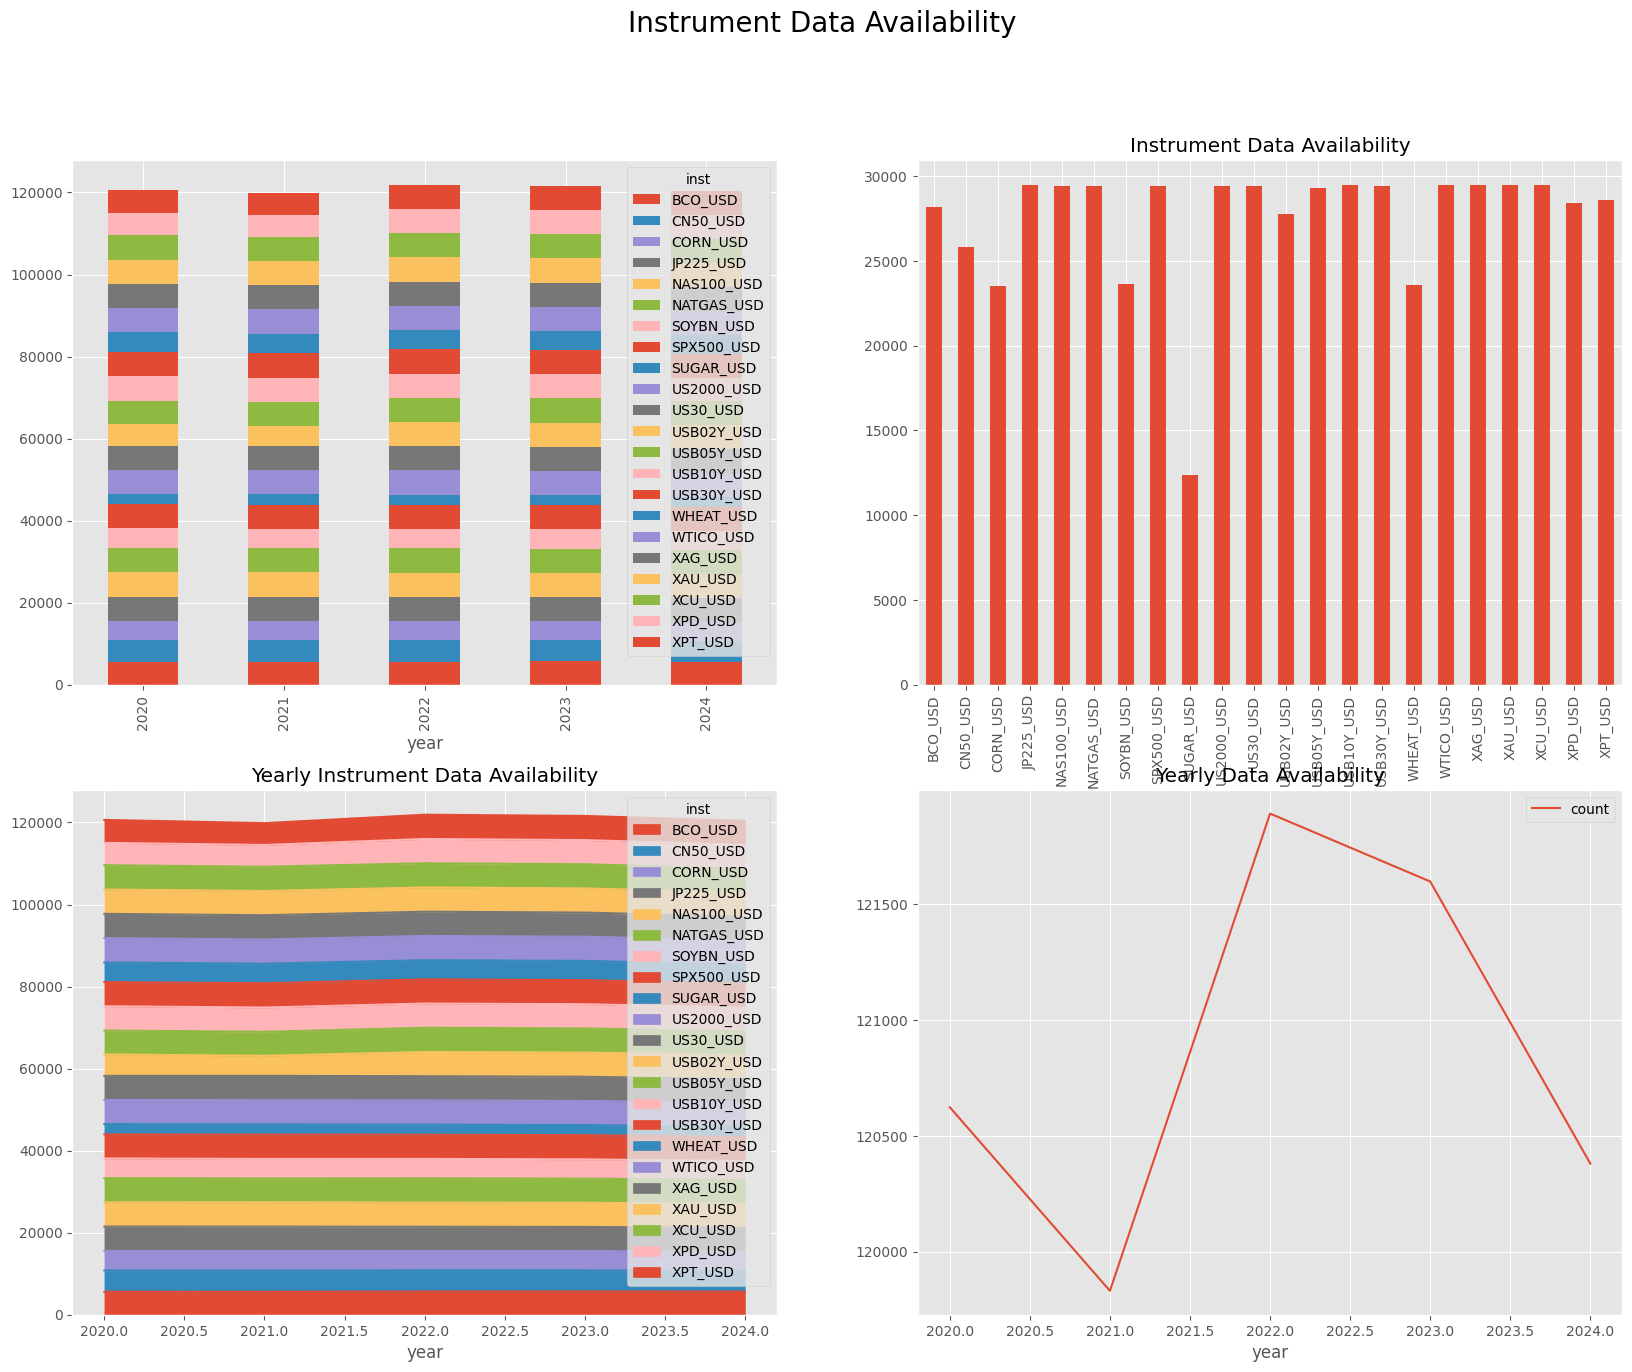

In [9]:
# Loading data and preparing DataFrames

df_raw = pd.concat(list(map(lambda x: pd.read_parquet(path.join(folder_main, folder_data, f'{x}.parquet')), insts_all))) ## reading parquet files for all and concatenating them into a single DataFrame
df_raw['year'] = df_raw.index.year
df_yearinst = df_raw.groupby(['year', 'inst'])['mid'].count().reset_index()
df_inst = df_raw.groupby(['inst'])['mid'].count().reset_index()
df_inst.rename(columns={'mid': 'count'}, inplace=True)
df_year = df_raw.groupby(['year'])['mid'].count().reset_index().set_index('year')
df_year.rename(columns={'mid': 'count'}, inplace=True)


# Pivot the data so each instrument is a column, index is year, values are mid counts
df_pivot = df_yearinst.pivot(index='year', columns='inst', values='mid')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
# Plot stacked bar chart
df_pivot.plot(kind='bar', stacked=True, ax=ax[0, 0])
df_inst.plot.bar(x='inst', y='count', title='Instrument Data Availability', ax=ax[0, 1], legend=False)
df_yearinst.pivot(index='year', columns='inst', values='mid').plot.area(stacked=True, ax=ax[1, 0], title='Yearly Instrument Data Availability')
df_year.plot(title='Yearly Data Availability', ax=ax[1, 1])
fig.suptitle('Instrument Data Availability', fontsize=20)


<h3 style="text-align: left;"><b> Backtest </b></h3>

<h4>Brute Force Grid Search: In / Out Sample Backtest</h4>

<p>
The following function implements a brute force grid search over a specified range of MACD parameters (short EMA, long EMA, and signal EMA) for a given instrument. The strategy logic is encapsulated in the <code>MACD</code> class, which handles the instantiation, backtesting, and metric extraction process.
</p>

<p>
The function accepts a DataFrame containing the instrument's data and performs the grid search using the <code>brute2</code> method from the <code>MACD</code> class. It supports flexible specification of the sample context via the <code>sample</code> argument (either 'in', 'out', or <code>None</code>), and optionally limits the number of observations through <code>sample_size</code>. The backtest results, including the Sharpe ratio and other statistics for each parameter combination, are compiled and returned as a DataFrame. Each result is tagged with the instrument and the corresponding parameter set.
</p>

<p>
This function forms the core of the in-sample and out-of-sample evaluation framework and is used to test how each hyperparameter combination performs on different data partitions.
</p>


In [10]:
def run_backtest(df, range_short, range_long, range_signal, sample_size, sample=None):
    """
    Run a brute-force grid search backtest for a MACD strategy on a given instrument.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing price data for a single instrument. Must include a 'mid' column and 'inst' column.
    range_short : iterable
        Range of values to test for the short EMA window.
    range_long : iterable
        Range of values to test for the long EMA window.
    range_signal : iterable
        Range of values to test for the signal EMA window.
    sample_size : int
        Number of rows to use from the data for the test sample (subset of full instrument data).
    sample : str or None, optional
        Indicates which data sample to use: 'in' for in-sample, 'out' for out-of-sample, or None for full sample.

    Returns
    -------
    pd.DataFrame
        DataFrame containing strategy statistics for each parameter combination, including Sharpe ratio and position sizing.
        Includes columns: 'params', 'inst', and backtest metrics.
    """

    # Extract the instrument name from the DataFrame
    inst = df.inst.unique()[0]

    # Initialize the MACD strategy object for the instrument with input data
    macd = MACD(inst=inst, df=df, col_backtest='mid', col_predict='mid', backtest_sample=sample_size)

    # Print out which sample is being optimized for traceability
    print(f'running {sample} sample brute optimizer for {macd} {inst}')

    # Run the brute-force grid search on the defined parameter ranges
    macd.brute2(
        range_short=range_short,
        range_long=range_long,
        range_signal=range_signal,
        opt_stat='sharpe_mean_annualized',  # Use annualized Sharpe ratio as optimization criterion
        sample=sample                       # Specify in/out/full sample
    )

    # Retrieve the appropriate metrics object based on the sample type
    if sample == 'in':
        metrics = macd.metrics_IN
    elif sample == 'out':
        metrics = macd.metrics_OUT
    else:
        metrics = macd.metrics

    # Get the full strategy performance metrics as a DataFrame
    df_stats = metrics.df_strats_all()

    # Extract numeric values from strategy parameter names and store as string
    df_stats['params'] = df_stats.index.map(lambda x: str(re.findall(r'\d+', x)))

    # Add instrument name to the results for traceability
    df_stats['inst'] = inst

    # Return the full metrics table with strategy evaluation results
    return df_stats


<h4>Randomized In-Sample Grid Search</h4>

<p>
This function extends the brute-force MACD grid search by applying it across <b>multiple randomized in-sample subsets</b> of a given instrument's data. It simulates variability in training data by randomly selecting multiple (e.g., 10) time-based folds from the in-sample period. For each random sample, the MACD grid search is performed using the <code>run_backtest</code> function, and the results are stored.
</p>

<p>
The goal of this approach is to evaluate the stability and robustness of MACD parameter configurations across different market environments, using pooled performance metrics such as the aggregated Sharpe ratio. This technique helps minimize overfitting to a single slice of data and supports more generalizable parameter selection.
</p>


In [11]:
def run_random_backtest(df, range_short, range_long, range_signal, sample_size, n=10, seed_=43):
    """
    Run a randomized backtest across multiple in-sample slices for a single instrument using a MACD strategy.

    This function repeatedly samples random time-contiguous windows from the instrument's data,
    performs a brute-force grid search on each slice, and aggregates the results. The method is used
    to assess parameter robustness by observing their performance across diverse market conditions.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing the instrument's price data. Must include 'mid' and 'inst' columns.
    range_short : iterable
        Range of short EMA window lengths to test.
    range_long : iterable
        Range of long EMA window lengths to test.
    range_signal : iterable
        Range of signal EMA window lengths to test.
    sample_size : int
        The number of rows to include in each random sample.
    n : int, optional
        The number of random samples to generate. Default is 10.
    seed_ : int, optional
        Random seed for reproducibility. Default is 43.

    Returns
    -------
    pd.DataFrame
        Concatenated DataFrame containing backtest results for all random samples, including strategy metrics
        and parameter identifiers.
    """
    # Get the instrument identifier from the data
    inst = df.inst.unique()[0]

    # Initialize an empty list to collect DataFrames from each run
    rand = []

    # Initialize a counter for tracking fold number
    counter = 0

    # Loop through n randomly generated index ranges
    for i in rand_samples(df=df, n=n, sample_size=sample_size, seed_=seed_):
        counter += 1
        beg, end = i  # Get start and end indices of the random window

        # Log the range used for this sample
        print(f'rand sample {inst}: {counter}, beg: {beg}, end: {end}')

        # Extract the random time slice of the instrument's data
        df_rand = df.iloc[beg:end]

        # Run the MACD grid search on the selected sample
        df_stats = run_backtest(df_rand, range_short, range_long, range_signal, sample_size, sample=None)

        # Append the result to the list
        rand.append(df_stats)

    # Concatenate all result DataFrames into one
    df_rand = pd.concat(rand)

    # Return the aggregated results
    return df_rand


<h4>Full Backtest Execution Loop for All Instruments</h4>

<p>
This block of code executes the entire backtesting pipeline for all instruments in the dataset. For each instrument, it loads the historical data, defines a grid of MACD hyperparameters, and runs a brute-force grid search to evaluate strategy performance on three data partitions: <b>in-sample</b> (80%), <b>out-of-sample</b> (20%), and <b>full-sample</b> (100%). Each result is saved into an HDF5 file using an appropriate key (e.g., 'in', 'out', 'all').
</p>

<p>
In addition to the standard splits, the code also performs <b>randomized in-sample backtests</b> by drawing multiple overlapping 80% windows from the in-sample data and re-running the MACD grid search on each fold. This approach supports robust evaluation and helps to detect parameter sets that generalize well across varying sample windows. All results are stored in a single HDF5 file per instrument, enabling unified post-analysis.
</p>


In [ ]:
# Define search ranges for MACD parameters
range_short = (24, 264, 24)    # Short EMA range: from 1 day to 11 days (in 24-hour increments)
range_long = (120, 800, 120)   # Long EMA range: from 5 to 33 days (in 120-hour increments)
range_signal = (24, 120, 48)   # Signal EMA range: from 1 to 5 days (in 48-hour increments)
sample_size = 0.8              # 80% of the data will be used for in-sample

# Print the total number of grid combinations being tested
print(f'length of grid: {len(grid(range_short, range_long, range_signal))}')

# Loop through each instrument in the full list
counter = 1
for inst in insts_all:
    print(f'processing instrument {counter}/{len(insts_all)}: {inst}')
    
    # Define file paths for reading data and writing backtest results
    filename = f'{inst}.parquet'
    path_data = path.join(folder_main, folder_data, filename)
    path_backtest = path.join(folder_main, folder_backtest, f'{inst}.h5')

    # Load the instrument's price data
    df = pd.read_parquet(path_data)

    # Run in-sample grid search and save results under 'in' key
    df_stats = run_backtest(
        df=df,
        range_short=range_short,
        range_long=range_long,
        range_signal=range_signal,
        sample_size=sample_size,
        sample='in'
    )
    df_stats.to_hdf(path_backtest, key='in', mode='w')

    # Run backtest on both out-of-sample (20%) and full sample (100%)
    for s in ['out', None]:
        df_stats = run_backtest(
            df=df,
            range_short=range_short,
            range_long=range_long,
            range_signal=range_signal,
            sample_size=sample_size,
            sample=s
        )
        # Save results to appropriate key
        if s is None:
            df_stats.to_hdf(path_backtest, key='all', mode='a')  # Full-sample
        else:
            df_stats.to_hdf(path_backtest, key=s, mode='a')      # Out-of-sample

    # Run randomized in-sample backtests (e.g., 10 folds of 80% of in-sample)
    df_rand = run_random_backtest(
        df=df,
        range_short=range_short,
        range_long=range_long,
        range_signal=range_signal,
        sample_size=sample_size,
        n=10
    )
    # Save the randomized results
    df_rand.to_hdf(path_backtest, key='rand', mode='a')

    # Increment instrument counter
    counter += 1


length of grid: 120
processing instrument 1/22: JP225_USD
running in sample brute optimizer for MACD({'inst': 'JP225_USD', 'col_backtest': ('JP225_USD', 'logret'), 'col_predict': ('JP225_USD', 'logret')}) JP225_USD


running out sample brute optimizer for MACD({'inst': 'JP225_USD', 'col_backtest': ('JP225_USD', 'logret'), 'col_predict': ('JP225_USD', 'logret')}) JP225_USD
running None sample brute optimizer for MACD({'inst': 'JP225_USD', 'col_backtest': ('JP225_USD', 'logret'), 'col_predict': ('JP225_USD', 'logret')}) JP225_USD
rand sample JP225_USD: 1, beg: 315, end: 23891
running None sample brute optimizer for MACD({'inst': 'JP225_USD', 'col_backtest': ('JP225_USD', 'logret'), 'col_predict': ('JP225_USD', 'logret')}) JP225_USD
rand sample JP225_USD: 2, beg: 2343, end: 25919
running None sample brute optimizer for MACD({'inst': 'JP225_USD', 'col_backtest': ('JP225_USD', 'logret'), 'col_predict': ('JP225_USD', 'logret')}) JP225_USD
rand sample JP225_USD: 3, beg: 5703, end: 29279
running None sample brute optimizer for MACD({'inst': 'JP225_USD', 'col_backtest': ('JP225_USD', 'logret'), 'col_predict': ('JP225_USD', 'logret')}) JP225_USD
rand sample JP225_USD: 4, beg: 1179, end: 24755
running None sa

<h3 style="text-align: left;"><b> Results </b></h3>

<h4>Compare In-Sample vs Out-of-Sample Strategy Statistics</h4>

<p>
This function loads backtest results for a given instrument and compares the performance of each parameter configuration between the <b>in-sample</b> and <b>out-of-sample</b> data. It calculates key metrics such as the mean return, standard deviation, and Sharpe ratio for both splits, assigns rankings based on the in-sample Sharpe ratio, and computes absolute performance deltas.
</p>

<p>
In addition, the function performs a two-sample t-test on the mean return differences, estimating the standard error, t-statistic, degrees of freedom, and p-value. The resulting DataFrame includes a rich set of comparative metrics per parameter set, organized in a hierarchical structure for easy analysis.
</p>


In [ ]:
def get_stats(inst):
    """
    Retrieve and compare in-sample vs. out-of-sample backtest metrics for a given instrument.

    This function loads backtest results for a specific instrument from disk, calculates
    Sharpe ratios, assigns ranks, and compares in- and out-of-sample performance using
    both absolute deltas and a two-sample t-test.

    Parameters
    ----------
    inst : str
        The instrument identifier (used to locate its saved backtest file).
    top : int, optional
        Reserved for future use (e.g., returning only the top N parameter sets).

    Returns
    -------
    df_stats_inst_compare : pd.DataFrame
        A multi-index DataFrame comparing in-sample and out-of-sample statistics for each
        parameter configuration. Includes Sharpe ratio deltas, t-test statistics, and p-values.
    inst : str
        The instrument identifier, returned for convenience.
    """

    # Construct file path to the backtest results for the instrument
    path_backtest = path.join(folder_main, folder_backtest, f'{inst}.h5')

    # Metrics to extract and compare
    cols_metrics = ['returns_mean', 'std', 'sharpe', 'rank_sharpe']
    stats = []

    # Load and process results for both 'in' and 'out' samples
    for s in ['in', 'out']:
        df_stats = pd.read_hdf(path_backtest, key=s)  # Load HDF5 table
        df_stats['sample'] = s

        # Compute Sharpe ratio manually
        df_stats['sharpe'] = df_stats['returns_mean'] / df_stats['std']

        # Rank by Sharpe ratio (lower rank is better)
        df_stats.sort_values('sharpe', ascending=True, inplace=True)
        df_stats.reset_index(drop=False, inplace=True)
        df_stats.rename(columns={'index': 'id'}, inplace=True)
        df_stats['rank_sharpe'] = df_stats.index + 1

        # Collect in/out sample data
        stats.append(df_stats)

    # Combine the stats into a single DataFrame
    df_stats_inst = pd.concat(stats)

    # Pivot so we can compare in vs out per parameter
    df_stats_inst_compare = df_stats_inst.pivot(index='params', columns='sample', values=cols_metrics + ['total_obs'])

    # Rank by in-sample Sharpe ratio (descending, best first)
    df_stats_inst_compare.sort_values(('rank_sharpe', 'in'), inplace=True, ascending=False)

    # Calculate absolute differences between in and out for each metric
    for metric in cols_metrics:
        df_stats_inst_compare[(metric, 'diff')] = (
            df_stats_inst_compare[(metric, 'in')] - df_stats_inst_compare[(metric, 'out')]
        ).abs()

    # Ensure metrics are consistently ordered by column
    df_stats_inst_compare.sort_index(axis=1, inplace=True)

    # Calculate standard error for the difference in means
    df_stats_inst_compare[('se', 'tstats')] = np.sqrt(
        (df_stats_inst_compare['std', 'in'] / df_stats_inst_compare['total_obs', 'in']) +
        (df_stats_inst_compare['std', 'out'] / df_stats_inst_compare['total_obs', 'out'])
    )

    # Compute t-statistic for difference in returns
    df_stats_inst_compare[('t', 'tstats')] = (
        df_stats_inst_compare[('returns_mean', 'diff')] / df_stats_inst_compare[('se', 'tstats')]
    )

    # Degrees of freedom for two-sample t-test
    df_stats_inst_compare[('df', 'tstats')] = (
        df_stats_inst_compare['total_obs', 'in'] + df_stats_inst_compare['total_obs', 'out'] - 2
    )

    # Compute two-tailed p-value from t-statistic
    df_stats_inst_compare[('p', 'tstats')] = 2 * (
        1 - t.cdf(np.abs(df_stats_inst_compare[('t', 'tstats')]),
                  df_stats_inst_compare[('df', 'tstats')])
    )

    # Round p-values for presentation
    df_stats_inst_compare[('p', 'tstats')] = df_stats_inst_compare[('p', 'tstats')].apply(lambda x: round(x, 2))

    # Final sort to ensure top Sharpe-ranked in-sample parameters are first
    df_stats_inst_compare.sort_values(('rank_sharpe', 'in'), ascending=False, inplace=True)
    df_stats_inst_compare.sort_index(axis=1, inplace=True)

    return df_stats_inst_compare, inst


<h4>Summarize Top Strategy Performance and Rank Stability</h4>

<p>
This function generates a summary of how well the top-performing MACD parameter configurations for a given instrument generalize from in-sample to out-of-sample evaluation. It selects a user-defined subset of top-ranked parameter sets and computes the average absolute differences in Sharpe ratio, mean returns, and rank position.
</p>


In [ ]:
def summarize_stats(inst, top: list):
    df_stats_inst_compare = get_stats(inst)[0]
    df_top_sharpe = df_stats_inst_compare.loc[df_stats_inst_compare.index.isin(top), :]

    stats_inst = {
        inst: {
            'params': str(df_top_sharpe.index.tolist()),

            # In-sample values
            'sharpe.in': df_top_sharpe[('sharpe', 'in')].values[0],
            'rank_sharpe.in': df_top_sharpe[('rank_sharpe', 'in')].values[0],
            'returns_mean.in': df_top_sharpe[('returns_mean', 'in')].values[0],

            # Out-of-sample values
            'sharpe.out': df_top_sharpe[('sharpe', 'out')].values[0],
            'rank_sharpe.out': df_top_sharpe[('rank_sharpe', 'out')].values[0],
            'returns_mean.out': df_top_sharpe[('returns_mean', 'out')].values[0],

            # Differences
            'sharpe.diff': df_top_sharpe[('sharpe', 'diff')].values[0],
            'rank_sharpe.diff': df_top_sharpe[('rank_sharpe', 'diff')].values[0],
            'returns_mean.diff': df_top_sharpe[('returns_mean', 'diff')].values[0],
            'returns_mean.p': df_top_sharpe[('p', 'tstats')].values[0],


            
        }
    }

    df_stats_top = pd.DataFrame(stats_inst).T
    return df_stats_top


<h4>Pooled Performance Statistics from Randomized In-Sample Folds</h4>

<p>
This function processes the results of randomized in-sample backtests for a given instrument and calculates <b>pooled performance metrics</b> across multiple folds. These randomized samples are used to evaluate the stability and robustness of each MACD parameter configuration.
</p>

<p>
For each parameter set, the function aggregates the mean return, standard deviation, and Sharpe ratio, and then computes a <b>pooled Sharpe ratio</b> using weighted averages of returns and unbiased estimates of variance. The results are ranked by pooled Sharpe performance, providing a more reliable metric for parameter selection than a single split. The final output is a ranked table of parameter sets based on their aggregated performance.
</p>


In [ ]:
def get_stats_rand(inst):
    """
    Compute pooled Sharpe ratio and performance metrics from randomized in-sample backtests.

    This function reads the results of randomized grid searches for a specific instrument,
    aggregates metrics across the random folds, and computes the pooled Sharpe ratio for
    each parameter configuration using weighted statistics. Parameter sets are then ranked
    by their pooled Sharpe score.

    Parameters
    ----------
    inst : str
        The instrument identifier used to locate its saved randomized backtest results.

    Returns
    -------
    df_rand_calc : pd.DataFrame
        A DataFrame with one row per parameter configuration, including:
        - Weighted mean return and pooled standard deviation
        - Pooled Sharpe ratio
        - Rank based on pooled Sharpe
        - Aggregate statistics across folds
    """

    # Load randomized backtest results for the instrument
    path_backtest = path.join(folder_main, folder_backtest, f'{inst}.h5')
    df_rand = pd.read_hdf(path_backtest, key='rand')

    # Compute individual Sharpe ratios per fold
    df_rand['sharpe'] = df_rand['returns_mean'] / df_rand['std']

    # Compute weighted return and unbiased variance for each fold
    df_rand['returns_mean_weighted'] = df_rand['returns_mean'] * df_rand['total_obs']
    df_rand['var'] = df_rand['std'] ** 2
    df_rand['var_weighted'] = df_rand['var'] * (df_rand['total_obs'] - 1)

    # Group by instrument and parameter set, then aggregate metrics across folds
    df_rand_calc = df_rand.groupby(['inst', 'params']).agg(
        returns_mean_mean=pd.NamedAgg(column="returns_mean", aggfunc="mean"),
        returns_mean_annualized_mean=pd.NamedAgg(column="returns_mean_annualized", aggfunc="mean"),
        sharpe_mean_annualized_mean=pd.NamedAgg(column="sharpe_mean_annualized", aggfunc="mean"),
        std_mean=pd.NamedAgg(column="std", aggfunc="mean"),
        std_annualized_mean_mean=pd.NamedAgg(column="std_annualized", aggfunc="mean"),
        n_groups=pd.NamedAgg(column="total_obs", aggfunc="count"),
        total_obs=pd.NamedAgg(column="total_obs", aggfunc="sum"),
        returns_mean_weighted_sum=pd.NamedAgg(column="returns_mean_weighted", aggfunc="sum"),
        var_weighted_sum=pd.NamedAgg(column="var_weighted", aggfunc="sum"),
    )

    # Compute weighted average return
    df_rand_calc['returns_mean_wa'] = df_rand_calc['returns_mean_weighted_sum'] / df_rand_calc['total_obs']

    # Compute pooled standard deviation using unbiased pooled variance
    df_rand_calc['std_pooled'] = np.sqrt(
        df_rand_calc['var_weighted_sum'] / (df_rand_calc['total_obs'] - df_rand_calc['n_groups'])
    )

    # Compute pooled Sharpe ratio
    df_rand_calc['sharpe_pooled'] = df_rand_calc['returns_mean_wa'] / df_rand_calc['std_pooled']

    # Sort by pooled Sharpe to assign ranking
    df_rand_calc.sort_values('sharpe_pooled', ascending=True, inplace=True)
    df_rand_calc.reset_index(drop=False, inplace=True)
    df_rand_calc.rename(columns={'index': 'id'}, inplace=True)
    df_rand_calc['rank_sharpe'] = df_rand_calc.index + 1

    # Re-sort in descending order (best performing first)
    df_rand_calc.sort_values('sharpe_pooled', ascending=False, inplace=True)

    return df_rand_calc


<h4>Evaluate Top In-Sample Strategy Across All Instruments</h4>

<p>
This block identifies the best-performing MACD parameter set (based on in-sample Sharpe ratio) for each instrument and evaluates how well that top parameter generalizes to out-of-sample data. For each instrument, it uses the <code>get_stats</code> function to retrieve in/out sample comparison metrics and selects the top-ranked parameter set based on in-sample Sharpe. Then, using <code>summarize_stats</code>, it computes performance deltas and rank correlation metrics (e.g., Spearman, Kendall) to quantify the consistency of that top parameter's performance.
</p>

<p>
All summary statistics are aggregated into a single DataFrame across instruments, allowing for cross-sectional analysis of model robustness and generalization quality. The final DataFrame includes measures such as Sharpe ratio differences, rank consistency, and statistical test p-values.
</p>


In [ ]:
# Initialize a list to store top strategy stats for each instrument
top_inout = []

# Loop through all instruments
for inst in insts_all:

    # Retrieve the full in/out-sample comparison DataFrame for the instrument
    df_stats_top, inst = get_stats(inst)

    # Select the top-performing parameter based on in-sample Sharpe rank
    top_param = df_stats_top.head(1).index.tolist()

    # Summarize its generalization performance (across in/out sample)
    df_stats_top = summarize_stats(inst, top_param)

    # Append the summary to the results list
    top_inout.append(df_stats_top)

# Concatenate all instrument-level summaries into one DataFrame
df_top_inout = pd.concat(top_inout)

# Ensure all numeric columns are properly typed as float (for plotting/stats)
for c in df_top_inout.columns:
    if c != 'params':
        df_top_inout[c] = df_top_inout[c].astype('float')
# Display or return the resulting summary DataFrame


<hr>
<h4> <u> Table 1: Summary of Top In-Sample Strategies and Their Out-of-Sample Generalization </u> </h4>

<p>
The table below presents the evaluation of the top-performing MACD parameter set (selected based on in-sample Sharpe ratio) for each of 21 CFD instruments. The analysis includes the in-sample and out-of-sample values of Sharpe ratios, rank positions, and mean returns, followed by their absolute differences. These metrics allow us to assess both the quality and stability of strategy performance when deployed on unseen data.
</p>

<ul>
  <li><b>sharpe.in / sharpe.out</b> — Sharpe ratio computed on in-sample and out-of-sample data, respectively.</li>
  <li><b>rank_sharpe.in / rank_sharpe.out</b> — Rank of the parameter based on Sharpe ratio in in-sample and out-of-sample contexts (lower is better).</li>
  <li><b>returns_mean.in / returns_mean.out</b> — Mean return in in-sample and out-of-sample periods.</li>
  <li><b>sharpe.diff</b> — Absolute difference between in-sample and out-of-sample Sharpe ratios.</li>
  <li><b>rank_sharpe.diff</b> — Absolute change in Sharpe-based rank.</li>
  <li><b>returns_mean.diff</b> — Absolute difference in mean return between in and out of sample.</li>
  <li><b>returns_mean.p</b> — p-value from a two-sample t-test assessing whether the difference in mean returns is statistically significant.</li>
</ul>

<p>
<b>High-level observations:</b>
</p>

<ul>
  <li>Many instruments exhibit a <b>noticeable decline in Sharpe ratio</b> when moving from in-sample to out-of-sample, as seen in <code>sharpe.diff</code>. The worst cases (e.g., WTICO, WHEAT) indicate possible overfitting.</li>
  <li><b>Sharpe rank stability varies widely</b>, with <code>rank_sharpe.diff</code> values ranging from stable (CN50 with 1) to highly unstable (NATGAS, SOYBN over 100), suggesting sensitivity to sample choice.</li>
  <li>Despite shifts in rank, many strategies retain similar mean returns, although statistical tests show <code>returns_mean.p</code> below 0.99 in several cases — indicating statistically significant (but small) shifts.</li>
  <li>Stable instruments like NAS100, USB10Y, and USB05Y show near-zero Sharpe differences and high p-values, highlighting generalizable performance.</li>
  <li>Instruments with large rank drops and significant mean return changes may benefit from additional regularization or validation through randomized folds.</li>
</ul>

<p>
In summary, these results reinforce the importance of evaluating parameter generalization using out-of-sample performance — not just in-sample optimization — to avoid overfitting and improve robustness.
</p>

In [ ]:
ordered_cols = [
    'params',
    'sharpe.in', 'sharpe.out',
    'rank_sharpe.in', 'rank_sharpe.out',
    'returns_mean.in', 'returns_mean.out',
    'sharpe.diff', 'rank_sharpe.diff', 'returns_mean.diff', 'returns_mean.p'
]

df_top_inout = df_top_inout[ordered_cols]
df_top_inout




<hr>


<h4>Evaluation of Top Pooled Sharpe Strategies from Randomized In-Sample Folds</h4>

<p>
This block identifies and evaluates the best-performing MACD parameter set for each instrument based on the <b>pooled Sharpe ratio</b> computed across multiple randomized in-sample folds. The goal is to determine whether the parameter set that performs most consistently across different random in-sample windows also generalizes well to out-of-sample data.
</p>

<p>
For each instrument, the function <code>get_stats_rand</code> retrieves aggregated results from 10 randomized folds. The parameter set with the highest pooled Sharpe ratio is selected, and its performance is summarized using <code>summarize_stats</code>, which computes in/out-sample performance, absolute differences in key metrics, and a p-value for the return difference. The final output is a summary table across all instruments.
</p>


In [ ]:
# Initialize an empty list to collect summary results for all instruments
top_in_out_rand = []

# Loop through each instrument in the list
for inst in insts_all:

    # Load pooled Sharpe performance metrics from randomized folds
    df_stats_rand = get_stats_rand(inst)

    # Select the parameter set with the highest pooled Sharpe ratio
    top_rand = df_stats_rand.head(1).params.tolist()

    # Evaluate the selected top parameter using in/out-sample statistics
    df_stats_rand = summarize_stats(inst, top_rand)

    # Append the result to the collection list
    top_in_out_rand.append(df_stats_rand)

# Concatenate all individual summaries into a single DataFrame
df_top_in_out_rand = pd.concat(top_in_out_rand)

# Convert all numeric columns to float for compatibility (except 'params')
for c in df_top_in_out_rand.columns:
    if c != 'params':
        df_top_in_out_rand[c] = df_top_in_out_rand[c].astype('float')

<hr>
<h4> <u> Table 2: Results of Randomized In-Sample Pooled Sharpe Strategy Selection<</u> </h4>

<p>
The table below (<code>df_top_in_out_rand</code>) presents the evaluation of the best-performing MACD parameter set for each of 21 CFD instruments, where the top configuration is selected using the <b>pooled Sharpe ratio</b> across multiple <b>randomized in-sample folds</b>. This approach simulates variability in the in-sample training window and aims to identify parameter sets that generalize better by avoiding overfitting to any single data split.
</p>

<p>
For each selected strategy, the following metrics are provided:
</p>

<ul>
  <li><b>sharpe.in / sharpe.out</b> — Sharpe ratio on the in-sample and out-of-sample data.</li>
  <li><b>rank_sharpe.in / rank_sharpe.out</b> — Ranking of the parameter set among all candidates, for each sample.</li>
  <li><b>returns_mean.in / returns_mean.out</b> — Mean return in both sample partitions.</li>
  <li><b>sharpe.diff</b> — Absolute difference in Sharpe ratio.</li>
  <li><b>rank_sharpe.diff</b> — Change in rank between in- and out-of-sample.</li>
  <li><b>returns_mean.diff</b> — Difference in mean return.</li>
  <li><b>returns_mean.p</b> — p-value from a t-test for the return difference.</li>
</ul>

<p>
<b>Key Observations from <code>df_top_in_out_rand</code>:</b>
</p>

<ul>
  <li>Several strategies demonstrate <b>improved or stable out-of-sample Sharpe</b>, especially CN50 and CORN, suggesting that pooled Sharpe selection can help discover generalizable strategies.</li>
  <li>Some instruments like WTICO and SOYBN still show <b>sharp drops in performance out-of-sample</b>, indicating that even pooled strategies can overfit depending on the data.</li>
  <li><b>Rank stability</b> varies considerably. Instruments such as USB30Y and XCU exhibit large shifts (>80 rank positions), while others (XPD, USB05Y) remain relatively stable.</li>
  <li>Despite rank shifts, <code>returns_mean.p</code> values are mostly high (≥ 0.97), indicating that return differences are <b>not statistically significant</b> in most cases.</li>
  <li>Overall, the use of pooled Sharpe from randomized folds appears to improve generalization on average, with fewer extreme failures than single in-sample optimization.</li>
</ul>

<p>
These results reinforce the value of randomized validation within the training set and pooled performance metrics when selecting hyperparameters for financial strategies.
</p>


In [ ]:
# View the final table summarizing all instruments' top pooled strategies
df_top_in_out_rand

<hr>

In [ ]:
# Create comparison DataFrame
rank_diff_comparison = pd.DataFrame({
    'In-Sample Rank Diff': df_top_inout['rank_sharpe.diff'],
    'Randomized Pooled Rank Diff': df_top_in_out_rand['rank_sharpe.diff']
})

# Plot
ax = rank_diff_comparison.plot(kind='bar', figsize=(16, 6))
ax.set_title('Rank Difference Comparison: In-Sample vs. Randomized Pooled Sharpe', fontsize=14)
ax.set_ylabel('Absolute Rank Difference')
ax.set_xlabel('Instrument')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
df_top_in_out_rand['rank_sharpe.diff'].mean()

In [ ]:
df_top_inout['rank_sharpe.diff'].mean()

In [ ]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    df_top_in_out_rand['rank_sharpe.diff'],  # rand sample goes first
    df_top_inout['rank_sharpe.diff'],        # inout sample goes second
    equal_var=False,
    alternative='less'
)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")